In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [2]:
sns.set(style="whitegrid", palette="pastel", font_scale=1)
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
bank = pd.read_excel("Bank_updated.xlsx")

# 1. Exploratory Data Analysis - EDA

In [6]:
df = bank.copy()

In [7]:
df.sample(5)

,Client_ID,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_percent_income,gender,marital status,Other_debtors_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job Category,Income Level,Annual Income (PKR),Number_of_people_liable_for_maintenance,Credit_Risk
4393,C04394,"5,000 – 49,999",35,critical account/other credits existing (not a...,Credit Card,19205000,no saving account,unemployed,3,Male,single,none,2,Car,30,none,rent,1,Skilled worker,High Income,8226448,1,BAD
6473,C06474,"50,000 – 499,999",28,delay in paying off in the past,Auto Loan,11981000,"100,000 – 999,999",unemployed,3,Female,Divorced,none,2,Car,73,bank,own,4,Skilled worker,Low Income,865967,1,GOOD
9843,C09844,"50,000 – 499,999",49,no credits taken/ all credits paid back duly,Auto Loan,19224000,"100,000 – 999,999",>= 7 years,4,Male,Married,co-applicant,2,Property Mortgage,72,bank,rent,2,Skilled worker,Low Income,801653,2,BAD
875,C00876,"< 5,000",22,no credits taken/ all credits paid back duly,Housing Loan,19023000,no saving account,1 <= ... < 4 years,3,Female,Separated,co-applicant,2,Car,53,none,rent,1,Skilled worker,Low Income,794062,2,BAD
6806,C06807,"5,000 – 49,999",38,delay in paying off in the past,Personal Loan,19352000,"10,000 – 99,999",1 <= ... < 4 years,1,Male,single,none,2,security deposit,42,none,own,2,Salaried individuals,High Income,6245832,1,GOOD


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Client_ID                                10000 non-null  object
 1   Status_of_existing_checking_account      10000 non-null  object
 2   Duration_in_month                        10000 non-null  int64 
 3   Credit_history                           10000 non-null  object
 4   Purpose                                  10000 non-null  object
 5   Credit_amount                            10000 non-null  int64 
 6   Savings_account_bonds                    10000 non-null  object
 7   Present_employment_since                 10000 non-null  object
 8   Installment_rate_percent_income          10000 non-null  int64 
 9   gender                                   10000 non-null  object
 10  marital status                           10000 non-null  ob

In [9]:
df.describe(include=[np.number])

,Duration_in_month,Credit_amount,Installment_rate_percent_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Annual Income (PKR),Number_of_people_liable_for_maintenance
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,38.114300,1.017048e+07,2.505500,2.498400,46.779900,2.506500,5.844892e+06,1.495300
std,19.942758,5.655361e+06,1.118524,1.124599,16.682173,1.115743,5.236164e+06,0.500003
min,4.000000,2.500000e+05,1.000000,1.000000,18.000000,1.000000,2.945600e+04,1.000000
25%,21.000000,5.322500e+06,2.000000,1.000000,32.000000,2.000000,7.742022e+05,1.000000
50%,38.000000,1.021750e+07,3.000000,2.000000,47.000000,3.000000,6.103417e+06,1.000000
75%,56.000000,1.501625e+07,4.000000,4.000000,61.000000,4.000000,8.158132e+06,2.000000
max,72.000000,2.000000e+07,4.000000,4.000000,75.000000,4.000000,1.649816e+07,2.000000


In [10]:
bank.describe(include=["object"])

,Client_ID,Status_of_existing_checking_account,Credit_history,Purpose,Savings_account_bonds,Present_employment_since,gender,marital status,Other_debtors_guarantors,Property,Other_installment_plans,Housing,Job Category,Income Level,Credit_Risk
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,4,5,4,5,5,2,4,3,4,3,3,4,2,2
top,C00001,"50,000 – 499,999",critical account/other credits existing (not a...,Housing Loan,no saving account,1 <= ... < 4 years,Male,Separated,none,financial collateral,bank,for free,Skilled worker,High Income,GOOD
freq,1,2562,2081,2500,2033,2029,5202,2633,3386,2520,3369,3375,4000,6000,5021


In [11]:
num_cols = bank.select_dtypes(include=np.number).columns

In [12]:
corr = df[num_cols].corr()
corr

,Duration_in_month,Credit_amount,Installment_rate_percent_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Annual Income (PKR),Number_of_people_liable_for_maintenance
Duration_in_month,1.000000,-0.009667,0.006901,-0.020935,0.008080,0.011529,0.013886,-0.009309
Credit_amount,-0.009667,1.000000,-0.019758,-0.008734,-0.005201,-0.010677,-0.017133,-0.005666
Installment_rate_percent_income,0.006901,-0.019758,1.000000,-0.010289,-0.009505,0.009027,0.012753,-0.002994
Present_residence_since,-0.020935,-0.008734,-0.010289,1.000000,-0.002767,-0.000430,-0.005950,-0.024825
Age_in_years,0.008080,-0.005201,-0.009505,-0.002767,1.000000,0.010923,0.012436,0.001225
Number_of_existing_credits_at_this_bank,0.011529,-0.010677,0.009027,-0.000430,0.010923,1.000000,-0.007514,0.000413
Annual Income (PKR),0.013886,-0.017133,0.012753,-0.005950,0.012436,-0.007514,1.000000,0.003432
Number_of_people_liable_for_maintenance,-0.009309,-0.005666,-0.002994,-0.024825,0.001225,0.000413,0.003432,1.000000


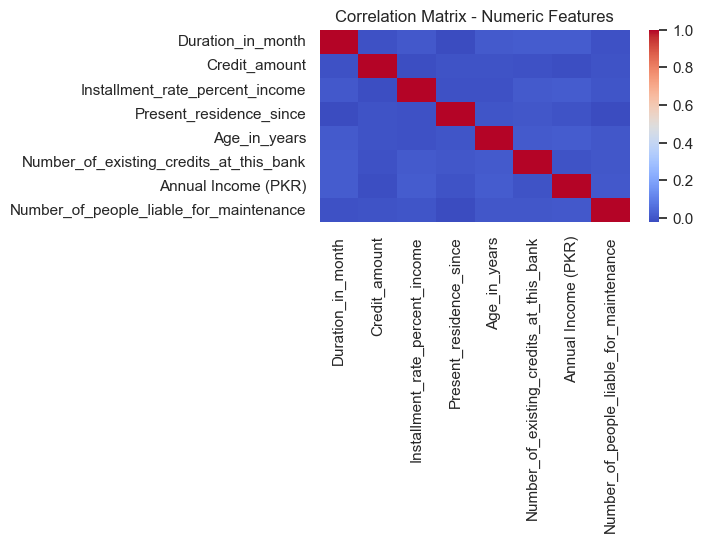

In [13]:
plt.figure(figsize=(5,2.5))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix - Numeric Features")
plt.show()

### Distribution Of Numeric Columns

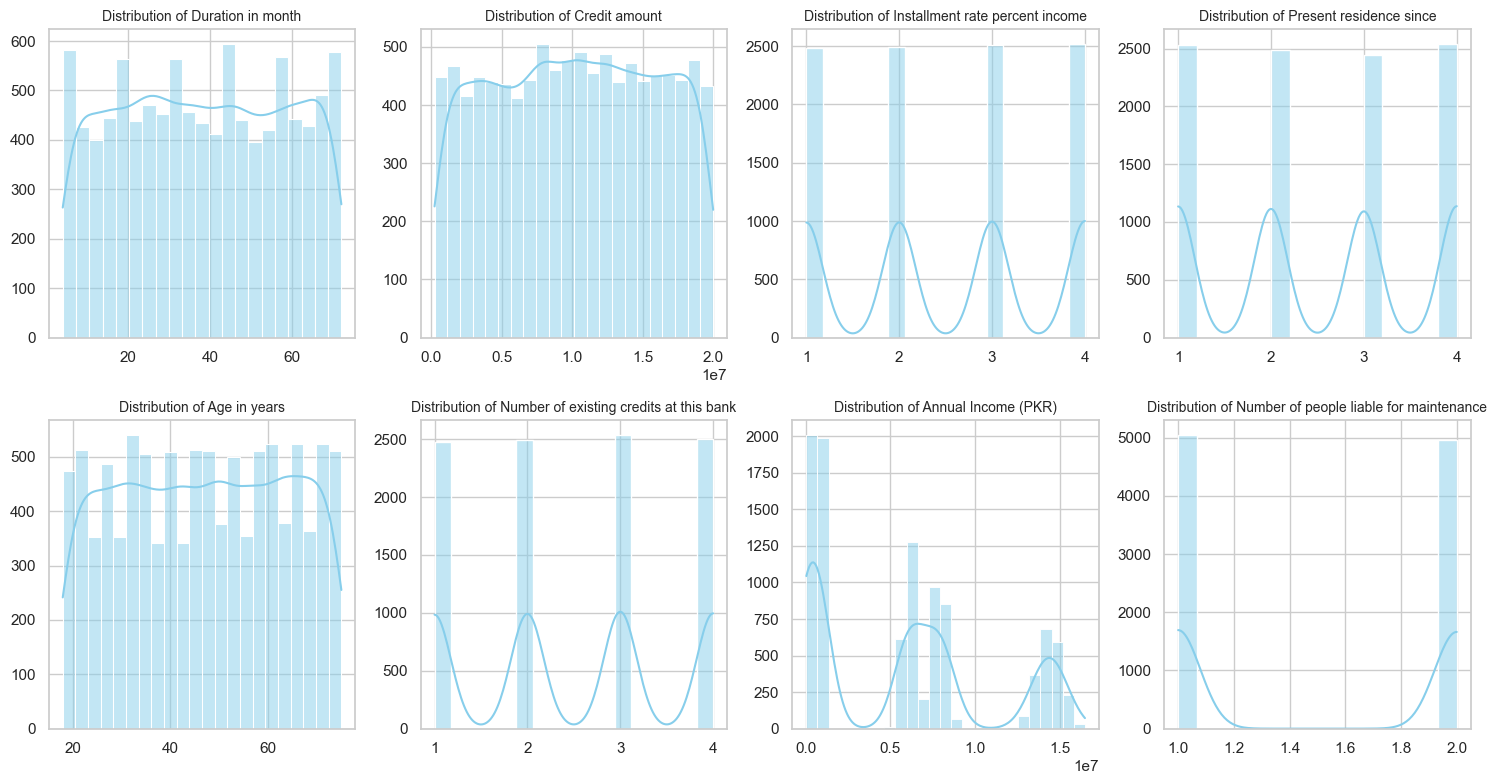

In [15]:
import math
num_features = df.select_dtypes(include=np.number).columns
num_features = [col for col in num_features if col in df.columns]

n_col = 4
n_row = math.ceil(len(num_features)/n_col)

fig, axes = plt.subplots(n_row, n_col, figsize=(15, n_row*4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(bank[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col.replace("_", " ")}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide empty subplots
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
num_features = df.select_dtypes(include=np.number).columns
num_features = [col for col in num_features if col in df.columns]
for index, col in enumerate(num_features):
    print(f"{index+1} - {col}: {df[col].skew()}")

1 - Duration_in_month: 0.003229567196427615
2 - Credit_amount: -0.018886686405736236
3 - Installment_rate_percent_income: -0.007123986877939628
4 - Present_residence_since: 0.005042666066646356
5 - Age_in_years: -0.01806878189469503
6 - Number_of_existing_credits_at_this_bank: -0.010261086454429596
7 - Annual Income (PKR): 0.44576668643499334
8 - Number_of_people_liable_for_maintenance: 0.018803651304273115


### Relationship With Target Variable

In [18]:
target = "Credit_Risk"

### Box Plot For Continious Features

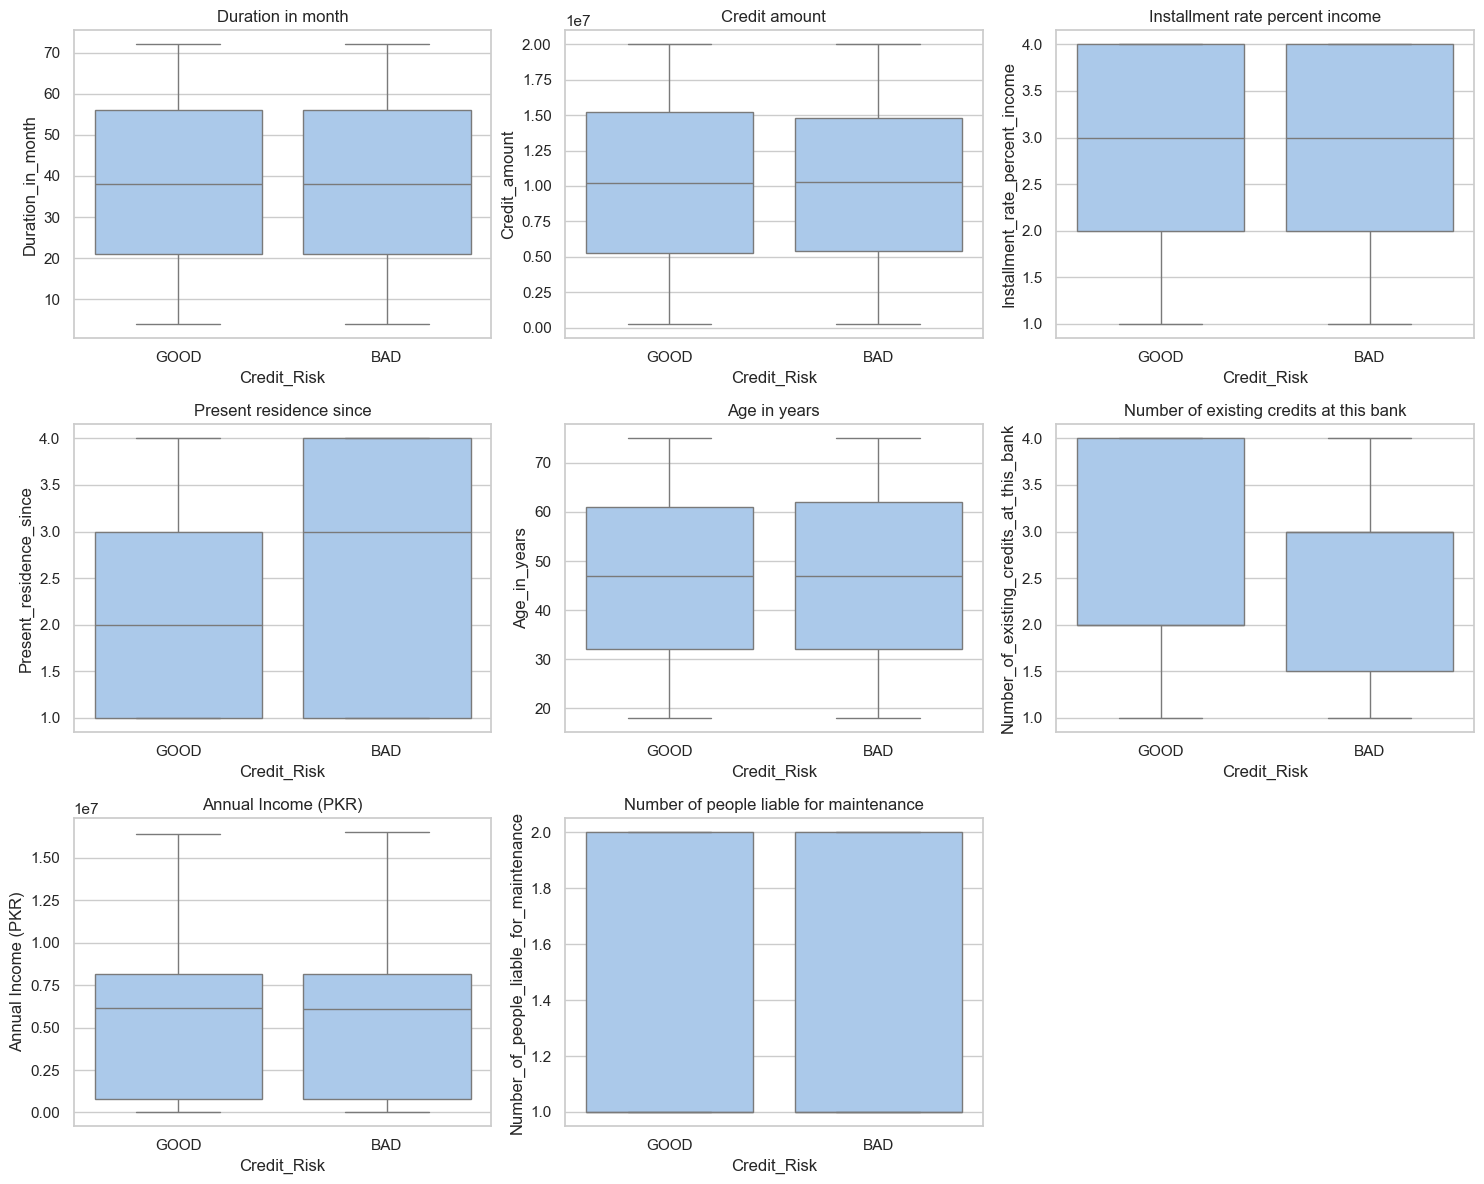

In [20]:
import math
num_features = [col for col in num_features if col in df.columns]

n_cols = 3
n_rows = math.ceil(len(num_features)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()


for i, col in enumerate(num_features):
        sns.boxplot(x=target, y=col, data=df, ax=axes[i], orient="v")
        axes[i].set_title(f"{col.replace("_", " ")}")

# Remove unused axes

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
df.describe()

,Duration_in_month,Credit_amount,Installment_rate_percent_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Annual Income (PKR),Number_of_people_liable_for_maintenance
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,38.114300,1.017048e+07,2.505500,2.498400,46.779900,2.506500,5.844892e+06,1.495300
std,19.942758,5.655361e+06,1.118524,1.124599,16.682173,1.115743,5.236164e+06,0.500003
min,4.000000,2.500000e+05,1.000000,1.000000,18.000000,1.000000,2.945600e+04,1.000000
25%,21.000000,5.322500e+06,2.000000,1.000000,32.000000,2.000000,7.742022e+05,1.000000
50%,38.000000,1.021750e+07,3.000000,2.000000,47.000000,3.000000,6.103417e+06,1.000000
75%,56.000000,1.501625e+07,4.000000,4.000000,61.000000,4.000000,8.158132e+06,2.000000
max,72.000000,2.000000e+07,4.000000,4.000000,75.000000,4.000000,1.649816e+07,2.000000


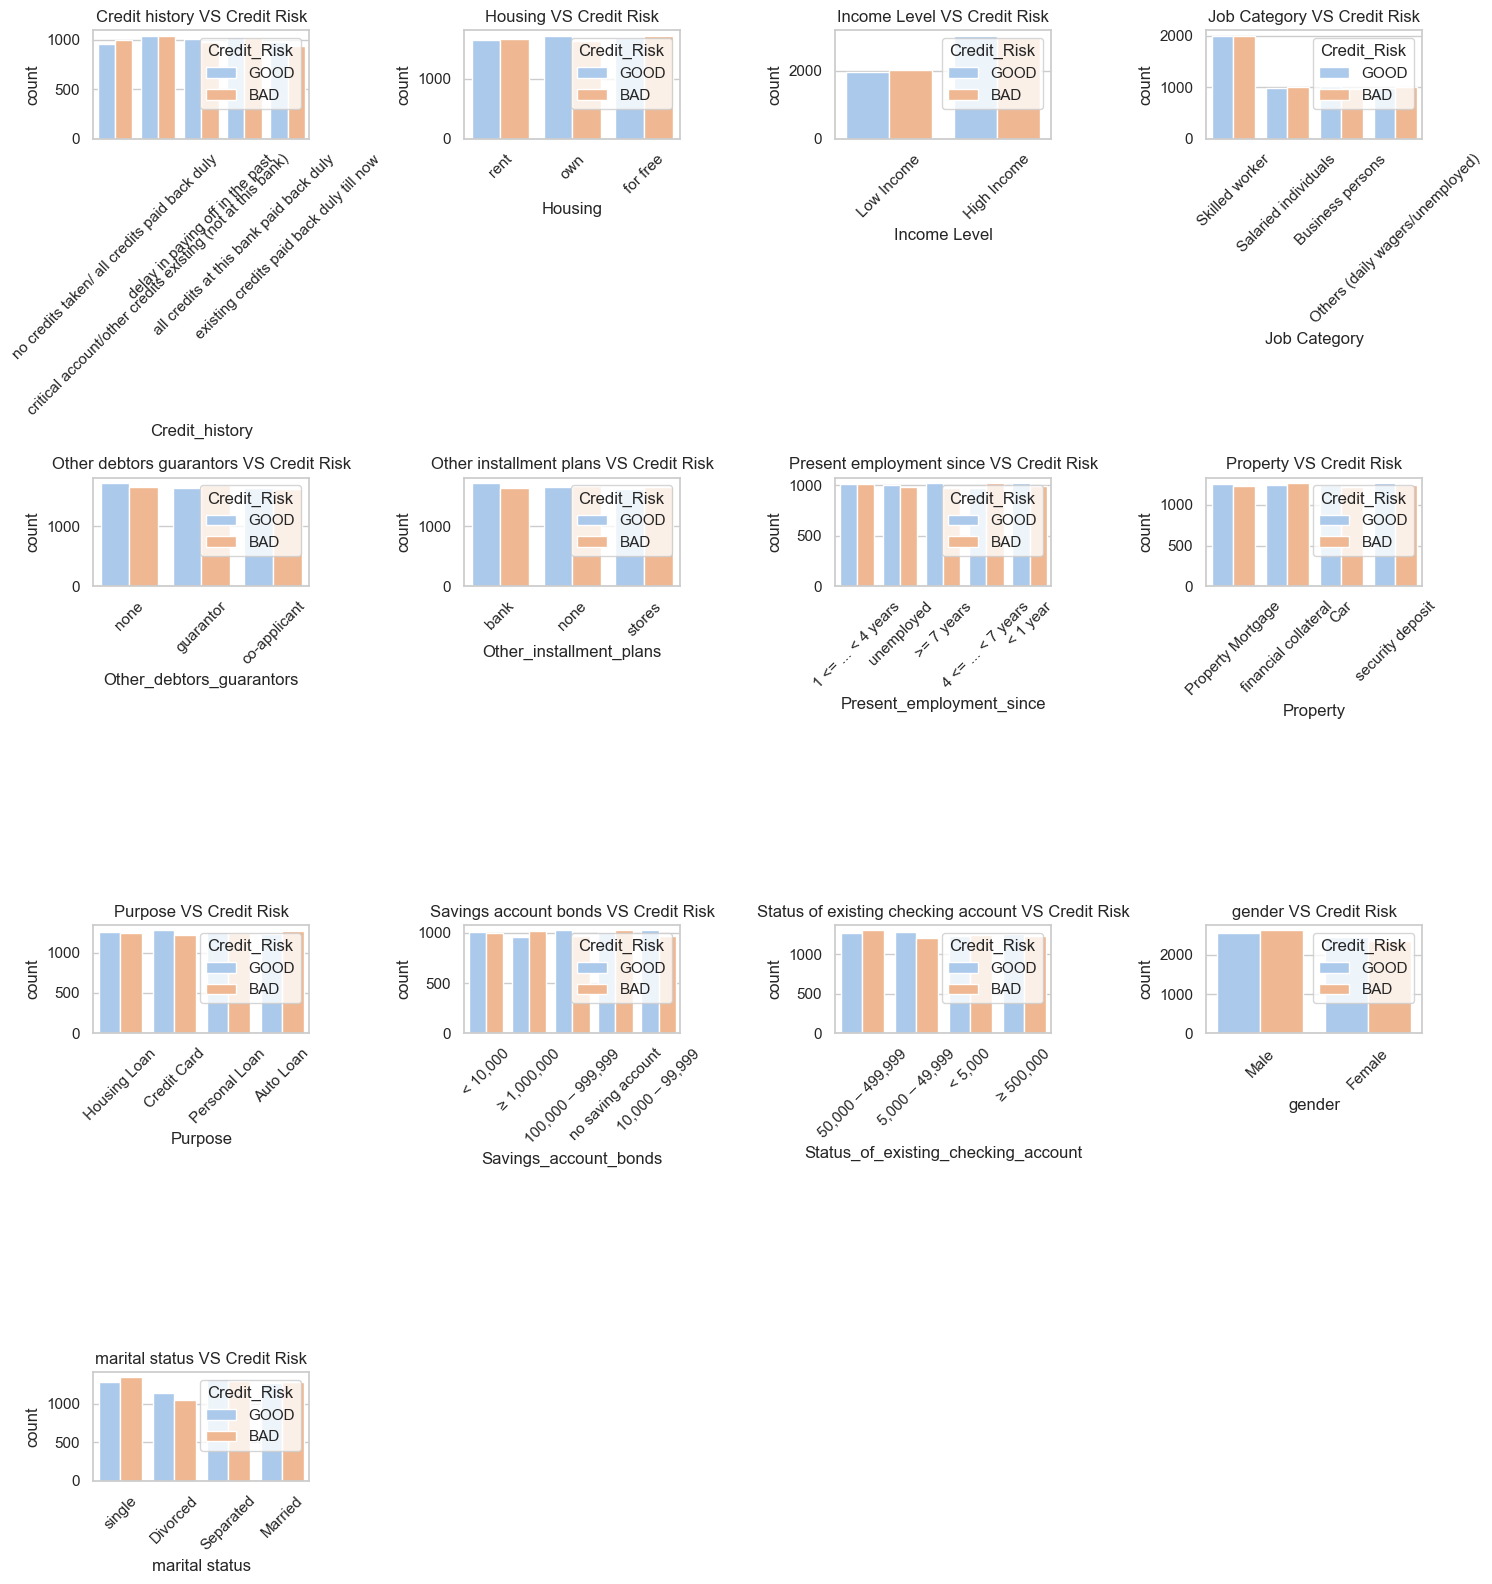

In [22]:
import math

cat_features = df.select_dtypes(include="object").columns.difference(["Client_ID", "Credit_Risk"])
cat_features = [col for col in cat_features if col in df.columns]

n_cols = 4
n_rows = math.ceil(len(cat_features)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()


for i, col in enumerate(cat_features):
        sns.countplot(x=col, hue=target, data=df, ax=axes[i])
        axes[i].set_title(f"{col.replace("_", " ")} VS {target.replace("_", " ")}")
        axes[i].tick_params(axis="x", rotation=45)
        

# Remove unused axes

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

### Correlation with Credit Risk (if numeric encoding)

In [24]:
if df[target].dtype != "object":
    corr_target = corr[target].sort_values(ascending=False)
    print("Top correlations with Credit_Risk:\n", corr_target.head(10))
else:
    print("Credit_Risk is categorical — correlations will be handled via group means or encoding.")

Credit_Risk is categorical — correlations will be handled via group means or encoding.


# Derived Metrics
### Example: Average Spending-to-Income Ratio by Risk

In [26]:
if "Annual Income (PKR)" in df.columns:
    ratio_summary = df.groupby(target)['Annual Income (PKR)'].mean()
    print("\nAverage Annual Income (PKR) by Credit Risk:\n", ratio_summary)
else:
    print("Nothing!")


Average Annual Income (PKR) by Credit Risk:
 Credit_Risk
BAD     5.770781e+06
GOOD    5.918384e+06
Name: Annual Income (PKR), dtype: float64


# Pairplot (key features)

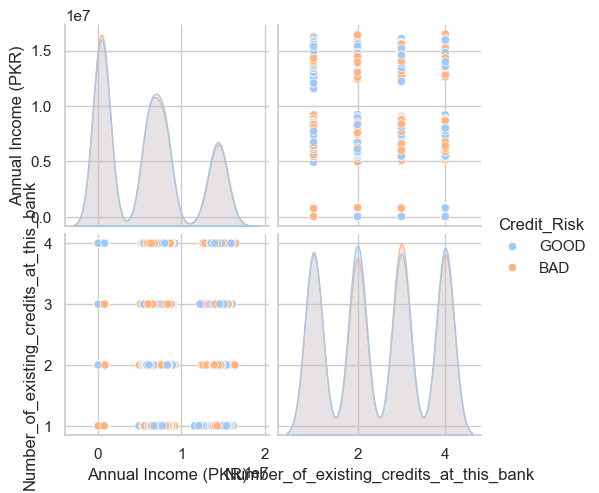

In [28]:
key_features = ['Annual Income (PKR)','Other_debtors_guarantors','Number_of_existing_credits_at_this_bank',
             'Other_installment_plans','Income Level',target]
existing = [f for f in key_features if f in df.columns]
sns.pairplot(df[existing], hue=target)
plt.show()

# Categorical Feature Insights

In [30]:
cat_features = [col for col in cat_features if col in df.columns]
print(f"\n--- {col} Crosstab ---")
display(pd.crosstab(df[col], df[target], normalize="index") * 10)


--- marital status Crosstab ---


Credit_Risk,BAD,GOOD
marital status,,
Divorced,4.796339,5.203661
Married,5.009777,4.990223
Separated,4.952526,5.047474
single,5.127619,4.872381


In [31]:
cat_features

['Credit_history',
 'Housing',
 'Income Level',
 'Job Category',
 'Other_debtors_guarantors',
 'Other_installment_plans',
 'Present_employment_since',
 'Property',
 'Purpose',
 'Savings_account_bonds',
 'Status_of_existing_checking_account',
 'gender',
 'marital status']

# Summary

In [33]:
print("\n✅ EDA Completed Successfully!")


✅ EDA Completed Successfully!


# 2. Feature Engineering

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.iloc[:,1:22]
y = df.iloc[:,-1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### a. Feature Engineering - Missing Value Imputation

In [39]:
# This data have not missing values

### c. Feature Engineering - Outlier Detection

In [41]:
# No outliers

### b. Feature Engineering - Handling Categorical Data

In [43]:
Status_of_existing_checking_account_order = [
    "< 5,000",
    "5,000 – 49,999",
    "50,000 – 499,999",
    "≥ 500,000"
  ]

Credit_history_order = [
    "no credits taken/ all credits paid back duly",
    "all credits at this bank paid back duly",
    "existing credits paid back duly till now",
    "delay in paying off in the past",
    "critical account/other credits existing (not at this bank)"
]

Savings_account_bonds_order = [
    "< 10,000",
    "10,000 – 99,999",
    "100,000 – 999,999",
    "≥ 1,000,000",
    "no saving account"   
]
Present_employment_since_order = [
    "unemployed",
    "< 1 year",
    "1 <= ... < 4 years",
    "4 <= ... < 7 years",
    ">= 7 years"
]

Other_debtors_guarantors_order = [
    "none",
    "co-applicant",
    "guarantor"    
]

Job_Category_order =[
    "Others (daily wagers/unemployed)",
    "Salaried individuals",
    "Skilled worker",
    "Business persons"
]

Income_Level_order = [
    "Low Income",
    "High Income"
]

In [44]:
ordinal_cols = {
    "Status_of_existing_checking_account" : Status_of_existing_checking_account_order,
    "Credit_history" : Credit_history_order,
    "Savings_account_bonds" : Savings_account_bonds_order,
    "Present_employment_since" : Present_employment_since_order,
    "Other_debtors_guarantors" : Other_debtors_guarantors_order,
    "Job Category" : Job_Category_order,
    "Income Level" : Income_Level_order
}

In [45]:
cat_cols = [
    "Purpose",
    "marital status",
    "gender",
    "Property",
    "Other_installment_plans",
    "Housing"
]

# Standardization

In [240]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
scaler = StandardScaler()

In [242]:
min_scaler = MinMaxScaler()

In [49]:
# scaler.fit(X_train_transformed)
# X_train_scaled = scaler.transform(X_train_transformed)
# X_test_scaled = scaler.transform(X_test_transformed)

In [50]:
# scaler.mean_

# Column Transformer

In [52]:
from sklearn.compose import ColumnTransformer

In [413]:
num_features = df.select_dtypes(include=np.number).columns
num_features = [col for col in num_features if col in df.columns]

In [415]:
num_col_indexes = [X_train.columns.get_loc(col) 
                   for col in X_train.select_dtypes(include=np.number).columns]

In [417]:
num_col_indexes

[1, 4, 7, 11, 13, 16, 19, 20]

In [447]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Status_of_existing_checking_account      8000 non-null   object
 1   Duration_in_month                        8000 non-null   int64 
 2   Credit_history                           8000 non-null   object
 3   Purpose                                  8000 non-null   object
 4   Credit_amount                            8000 non-null   int64 
 5   Savings_account_bonds                    8000 non-null   object
 6   Present_employment_since                 8000 non-null   object
 7   Installment_rate_percent_income          8000 non-null   int64 
 8   gender                                   8000 non-null   object
 9   marital status                           8000 non-null   object
 10  Other_debtors_guarantors                 8000 non-null   objec

In [419]:
# obj_cols = df.select_dtypes(include='object').columns
cat_col_indexes = [
    X_train.columns.get_loc(col) 
    for col in cat_cols
]

In [421]:
cat_col_indexes

[3, 9, 8, 12, 14, 15]

In [423]:
ord_col_indexes = [
    X_train.columns.get_loc(col) 
    for col in ordinal_cols 
]

In [425]:
ord_col_indexes

[0, 2, 5, 6, 10, 17, 18]

In [297]:
# transformer = ColumnTransformer(transformers=[
#     ("tnf1", StandardScaler(), num_cols), # Use index value instead of column name
#     ("tnf2", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"), cat_cols), # drop="first" is notrequired when we use Decision Tree & Random Forest
#     ("tnf3", OrdinalEncoder(categories=list(ordinal_cols.values())), list(ordinal_cols.keys()))
#     ], remainder="passthrough")

In [301]:
transformer = ColumnTransformer(transformers=[
    ("trf1", MinMaxScaler(), num_col_indexes), # Use index value instead of column name
    ("trf2", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"), cat_col_indexes), # drop="first" is not required when we use Decision Tree & Random Forest
    ("trf3", OrdinalEncoder(categories=list(ordinal_cols.values()),handle_unknown="use_encoded_value", unknown_value=-1), ord_col_indexes)
    ], remainder="passthrough")

In [303]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', MinMaxScaler(),
                                 [1, 4, 7, 11, 13, 16, 19, 20]),
                                ('trf2',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [3, 9, 8, 12, 14, 15]),
                                ('trf3',
                                 OrdinalEncoder(categories=[['< 5,000',
                                                             '5,000 – 49,999',
                                                             '50,000 – 499,999',
                                                             '≥ 500,000'],
                                                            ['no credits '
                                                             'taken/ all '
                                                             'credits paid '
                                                             'back duly',
                                                             'all credits at...
                                                             '999,999',
                                                             '≥ 1,000,000',
                                                             'no saving '
                                                             'account'],
                                                            ['unemployed',
                                                             '< 1 year',
                                                             '1 <= ... < 4 '
                                                             'years',
                                                             '4 <= ... < 7 '
                                                             'years',
                                                             '>= 7 years'],
                                                            ['none',
                                                             'co-applicant',
                                                             'guarantor'],
                                                            ['Others (daily '
                                                             'wagers/unemployed)',
                                                             'Salaried '
                                                             'individuals',
                                                             'Skilled worker',
                                                             'Business '
                                                             'persons'],
                                                            ['Low Income',
                                                             'High Income']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 [0, 2, 5, 6, 10, 17, 18])])

In [63]:
# ohe = transformer.named_transformers_["trf2"]
# ohe_cols = ohe.get_feature_names_out(cat_cols)

In [64]:
# ord_cols = list(ordinal_cols.keys())

In [65]:
# orig_cols = X.columns
# passthrough_cols = [col for col in orig_cols if col not in cat_cols and col not in ordinal_cols.keys()]

In [66]:
# new_cols = list(ohe_cols) + ord_cols + passthrough_cols

In [307]:
X_train_transformed = transformer.fit_transform(X_train)

In [309]:
X_test_transformed = transformer.transform(X_test)

In [311]:
le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

In [313]:
y_test_transformed = le.transform(y_test)

In [71]:
# X_train_scaled = pd.DataFrame(X_train_transformed, columns=new_cols)
# X_test_scaled = pd.DataFrame(X_test_transformed, columns=new_cols)

In [72]:
# X_train_scaled.describe()

In [73]:
# X_train_scaled

In [595]:
y_train

9254    GOOD
1561     BAD
1670     BAD
6087    GOOD
6669     BAD
        ... 
5734     BAD
5191    GOOD
5390    GOOD
860     GOOD
7270     BAD
Name: Credit_Risk, Length: 8000, dtype: object

# Feature Engineering - Feature Scalling

In [315]:
from sklearn.feature_selection import SelectKBest, chi2

In [323]:
X_transformed_new = SelectKBest(score_func=chi2, k=10).fit_transform(X_train_transformed, y_train_transformed)

In [325]:
X_transformed_new.shape

(8000, 10)

# Pipe Line Transformer

In [633]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Column index groups
num_col_indexes = [1, 4, 7, 11, 13, 16, 19, 20]
cat_col_indexes = [3, 9, 8, 12, 14, 15]
ord_col_indexes = [0, 2, 5, 6, 10, 17, 18]

# Define preprocessing for each type
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_col_indexes),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_col_indexes),
        ("ord", OrdinalEncoder(), ord_col_indexes)
    ]
)

# Full pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scale",SelectKBest(score_func=mutual_info_classif, k=5)),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        class_weight="balanced",
        random_state=42
    ))
])

# Fit the pipeline
pipe.fit(X_train, y_train_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  [1, 4, 7, 11, 13, 16, 19,
                                                   20]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [3, 9, 8, 12, 14, 15]),
                                                 ('ord', OrdinalEncoder(),
                                                  [0, 2, 5, 6, 10, 17, 18])])),
                ('scale',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x000002E9C4A54540>)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])

In [635]:
y_pred = pipe.predict(X_test)

In [637]:
print("Accuracy Score Random Forest Pipe: {}".format(accuracy_score(y_test_transformed, y_pred)))

Accuracy Score Random Forest Pipe: 0.479


In [639]:
y_train.value_counts(normalize=True)

Credit_Risk
GOOD    0.50275
BAD     0.49725
Name: proportion, dtype: float64

In [641]:
np.mean(cross_val_score(pipe, X_train, y_train_transformed, cv=10, scoring="accuracy"))

0.5025000000000001

In [644]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, pos_label="GOOD"),
    "recall": make_scorer(recall_score, pos_label="GOOD"),
    "f1": make_scorer(f1_score, pos_label="GOOD")
}

results = cross_validate(pipe, X_train, y_train, cv=10, scoring=scoring)

In [646]:
results

{'fit_time': array([1.81467557, 1.61283398, 1.66943836, 1.56338501, 1.4879725 ,
        1.96877885, 2.40465784, 2.35175848, 1.76578736, 1.66089225]),
 'score_time': array([0.05200553, 0.04318976, 0.04702592, 0.04057121, 0.03799844,
        0.05099916, 0.07853079, 0.05599999, 0.04800057, 0.03999758]),
 'test_accuracy': array([0.50625, 0.4875 , 0.5125 , 0.49625, 0.46   , 0.50875, 0.4825 ,
        0.53125, 0.5125 , 0.50125]),
 'test_precision': array([0.5104712 , 0.49086162, 0.51463415, 0.49878935, 0.46527778,
        0.51105651, 0.48522167, 0.53284672, 0.51265823, 0.50470219]),
 'test_recall': array([0.48387097, 0.46650124, 0.52487562, 0.51243781, 0.5       ,
        0.51741294, 0.49004975, 0.54477612, 0.60447761, 0.40049751]),
 'test_f1': array([0.49681529, 0.4783715 , 0.51970443, 0.50552147, 0.48201439,
        0.51421508, 0.48762376, 0.53874539, 0.55479452, 0.44660194])}

In [662]:
results["test_accuracy"].std()

0.01866187624543684

In [76]:
# from sklearn.pipeline import Pipeline

In [77]:
# from sklearn.tree import DecisionTreeClassifier

In [78]:
# trf4 = DecisionTreeClassifier()

In [79]:
# pipe = Pipeline([
#     ("trf1", transformer["tnf1"]),
#     ("trf2", transformer["tnf2"]),
#     ("trf3", transformer["tnf3"]),
#     ("trf4", trf4)
# ])

In [80]:
# pipe.fit(X_train, y_train)

# Decision Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [268]:
dt = DecisionTreeClassifier()

In [293]:
dt.fit(X_transformed_new, y_train_transformed)
y_pred = dt.predict(X_test_trans)
print("Accuracy Score Decision Tree: {}".format(accuracy_score(y_test_transformed, y_pred)))

ValueError: X has 29 features, but DecisionTreeClassifier is expecting 10 features as input.

In [272]:
y_predict = dt.predict(X_test_transformed)

In [274]:
accuracy_score(y_test_transformed, y_predict)

0.4935

# Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [279]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [281]:
rf.fit(X_train_transformed, y_train_transformed)
y_pred = rf.predict(X_test_transformed)
print("Accuracy Score Random Forest: {}".format(accuracy_score(y_test_transformed, y_pred)))

Accuracy Score Random Forest: 0.5005


In [283]:
gb.fit(X_train_transformed, y_train_transformed)
y_pred = gb.predict(X_test_transformed)
print("Accuracy Score Gradient Boosting: {}".format(accuracy_score(y_test_transformed, y_pred)))

Accuracy Score Gradient Boosting: 0.496


In [285]:
svc.fit(X_train_transformed, y_train_transformed)
y_pred = svc.predict(X_test_transformed)
print("Accuracy Score SVC: {}".format(accuracy_score(y_test_transformed, y_pred)))

Accuracy Score SVC: 0.4985


In [189]:
lr.fit(X_train_transformed, y_train_transformed)
y_pred = lr.predict(X_test_transformed)
print("Accuracy Score Logistic Regression: {}".format(accuracy_score(y_test_transformed, y_pred)))

Accuracy Score Logistic Regression: 0.4875


In [287]:
from sklearn.model_selection import cross_val_score

In [289]:
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75, random_state=42), X_train_transformed, y_train_transformed, cv=10, scoring="accuracy"))

0.501875

# Grid Search CV

In [198]:
from sklearn.model_selection import GridSearchCV

In [200]:
params = {
    "n_estimators" : [20, 60, 100, 120],
    "max_features" : [0.2, 0.6, 1.0],
    "max_depth" : [2,8,None],
    "max_samples" : [0.5, 0.75, 1.0]
}

In [202]:
rf = RandomForestClassifier()

In [204]:
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=5,
    verbose=2,
    n_jobs= -1
)

In [206]:
rf_grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [208]:
rf_grid.fit(X_train_transformed, y_train_transformed)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [210]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 120}

In [212]:
rf_grid.best_score_

0.51075

# Power Transformer